In [1]:
from jupyter_tikz import TexFragment
import os, sys
from IPython.display import display, HTML, Markdown, Math

# To find local version of the library
sys.path.append('../src')

from pmule import PredecessorTable, ProjectGraph, EarnedValue

In [2]:
%%capture
%mkdir -p ~/temp
%cd ~/temp

In [3]:
# bmatrix esta sacada de: https://stackoverflow.com/questions/17129290/numpy-2d-and-1d-array-to-latex-bmatrix
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    a = a.values
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

from pmule import *
# Alargamos el ancho de las celdas a un tanto por ciento
from IPython.display import display, HTML, Markdown, Math, Latex
display(HTML("<style>.container { width:80% !important; }</style>"))
import pandas as pd
import numpy as np
import sympy as sym

proyecto = ProjectGraph.from_dict_of_strings({
    "A": "---",
    "B": "---",
    "C": "B",
    "D": "---",
    "E": "A,B",
    "F": "C",
    "G": "C",
    "H": "D,E",
    "I": "E,F",
    "J": "G,H",
    "K": "H,I",
    "L": "I",
    "M": "J",
    "N": "K",
})

In [4]:
duraciones = {
 'A': 4,
 'B': 6,
 'C': 9,
 'D': 6,
 'E': 11,
 'F': 4,
 'G': 15,
 'H': 24,
 'I': 6,
 'J': 13,
 'K': 6,
 'L': 11,
 'M': 13,
 'N': 6}

In [5]:
rutas = pd.Series({key: ', '.join(value) for key, value in proyecto.paths(dummies=False).items()}).to_frame().rename({0:'Activities'}, axis=1)

# Ejercicio:
A partir de los datos de las posibles rutas entre el nodo inicial y final del proyecto, y de los datos de duraciones y costes siguientes:

In [6]:
#| tbl-cap: "Información sobre las rutas del proyecto"
#| label: tbl-datosRutas
rutas

,Activities
Route_1,"A, E, H, J, M"
Route_2,"A, E, H, K, N"
Route_3,"A, E, I, K, N"
Route_4,"A, E, I, L"
Route_5,"B, C, F, I, K, N"
Route_6,"B, C, F, I, L"
Route_7,"B, C, G, J, M"
Route_8,"B, E, H, J, M"
Route_9,"B, E, H, K, N"
Route_10,"B, E, I, K, N"


In [7]:
#| tbl-cap: "Duración de las actividades del proyecto"
#| label: tbl-datosDuraciones
pd.Series(duraciones).to_frame(name='duración')

,duración
A,4
B,6
C,9
D,6
E,11
F,4
G,15
H,24
I,6
J,13


Se pide:

In [8]:
pregunta_1 = "1. Determinar la matriz de caminos del proyecto  "
pregunta_2 = "2. Utilizar la matriz de caminos del proyecto para calcular su duración  "
pregunta_3 = "3. Calcular utilizando el método de Zaderenko los tiempos tempranos y tardíos  "
pregunta_4 = "4. Cuadro de prelaciones transitivas (ancestros)  "

In [9]:
display(Markdown(pregunta_1))
display(Markdown(pregunta_2))
display(Markdown(pregunta_3))
display(Markdown(pregunta_4))

1. Determinar la matriz de caminos del proyecto  

2. Utilizar la matriz de caminos del proyecto para calcular su duración  

3. Calcular utilizando el método de Zaderenko los tiempos tempranos y tardíos  

4. Cuadro de prelaciones transitivas (ancestros)  

Realizar los cálculos utilizando números enteros con redondeo siempre hacia infinito positivo.

# Solución

## Apartado 1

In [10]:
display(Markdown(pregunta_1))

1. Determinar la matriz de caminos del proyecto  

Resulta inmediato, a partir de los datos proporcionados en el enunciado sobre las rutas del proyecto, construir la matriz pedida.

In [11]:
#| tbl-cap: "Cuadro de prelaciones expandido"
#| label: tbl-MatrizPrelaciones
proyecto.display_path_matrix(dummies=False)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
Route_1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
Route_2,1,0,0,0,1,0,0,1,0,0,1,0,0,1
Route_3,1,0,0,0,1,0,0,0,1,0,1,0,0,1
Route_4,1,0,0,0,1,0,0,0,1,0,0,1,0,0
Route_5,0,1,1,0,0,1,0,0,1,0,1,0,0,1
Route_6,0,1,1,0,0,1,0,0,1,0,0,1,0,0
Route_7,0,1,1,0,0,0,1,0,0,1,0,0,1,0
Route_8,0,1,0,0,1,0,0,1,0,1,0,0,1,0
Route_9,0,1,0,0,1,0,0,1,0,0,1,0,0,1
Route_10,0,1,0,0,1,0,0,0,1,0,1,0,0,1


## Apartado 2

In [12]:
display(Markdown(pregunta_2))

2. Utilizar la matriz de caminos del proyecto para calcular su duración  

Multiplicando la matriz de rutas por el vector (columna) de duraciones de las actividades proporciona el vector (columna) de duraciones de los respectivos caminos. El mayor de estos valores es la duración del proyecto.

In [13]:
D = pd.Series(duraciones).to_frame()
path_matrix = proyecto.path_matrix(dummies=False)
duraciones_caminos = path_matrix @ D

In [14]:
# LaTex for pretty print, the calculations are already done
Math(  bmatrix(path_matrix) + " \\times " + bmatrix(D)   + " = " + bmatrix(duraciones_caminos))

<IPython.core.display.Math object>

In [15]:
Markdown(f"La mayor duración de los caminos es {duraciones_caminos.values.max()}")

La mayor duración de los caminos es 67

## Apartado 3

In [16]:
display(Markdown(pregunta_3))

3. Calcular utilizando el método de Zaderenko los tiempos tempranos y tardíos  

Contruimos primero el grafo Pert a partir de los datos del enunciado sobre las rutas del proyecto.

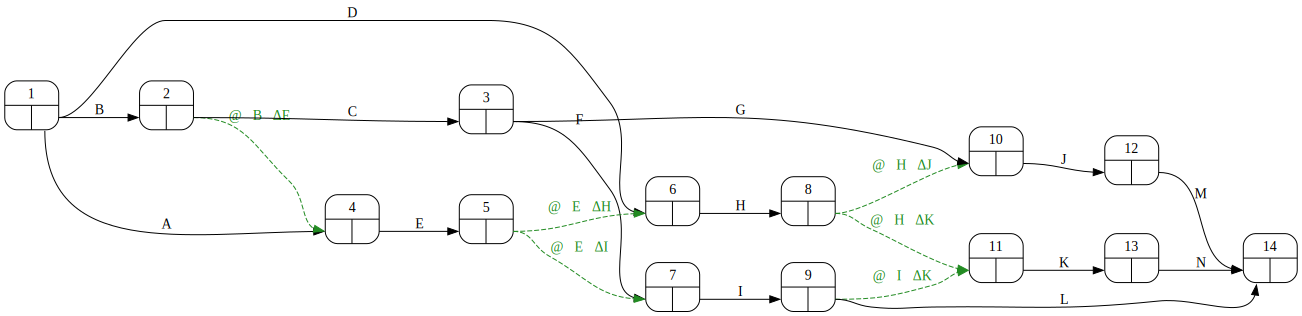

In [17]:
#| fig-cap: "Grafo Pert"
#| label: fig-PertSinTiempos
proyecto.pert(durations=False, ranksep=1)

In [18]:
#| tbl-cap: "Cálculo de los tiempos tempranos y tardíos con el método de Zaderenko"
#| label: tbl-MatrizZaderenko
proyecto.zaderenko(duraciones)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,early
1,,6.0,,4.0,,6.0,,,,,,,,,0.0
2,,,9.0,0.0,,,,,,,,,,,6.0
3,,,,,,,4.0,,,15.0,,,,,15.0
4,,,,,11.0,,,,,,,,,,6.0
5,,,,,,0.0,0.0,,,,,,,,17.0
6,,,,,,,,24.0,,,,,,,17.0
7,,,,,,,,,6.0,,,,,,19.0
8,,,,,,,,,,0.0,0.0,,,,41.0
9,,,,,,,,,,,0.0,,,11.0,25.0
10,,,,,,,,,,,,13.0,,,41.0


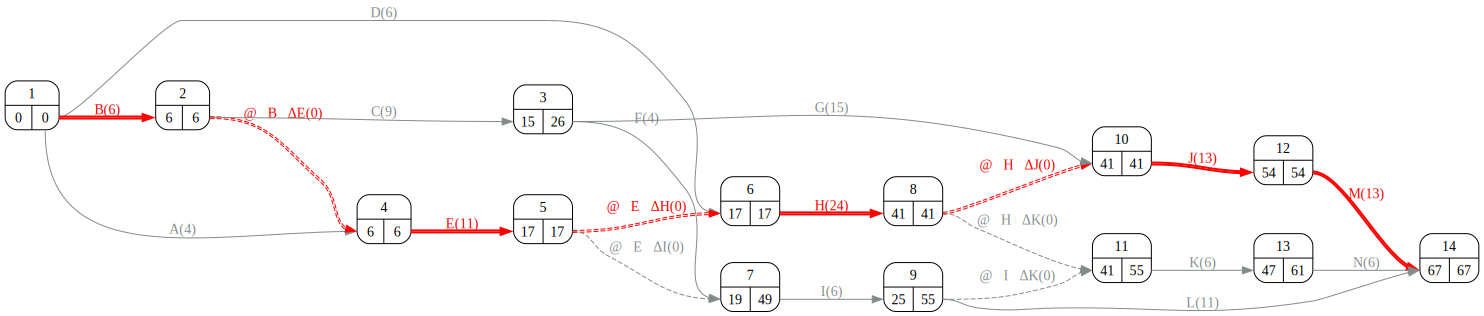

In [19]:
#| fig-cap: "Grafo Pert con indicación de tiempos y rutas del camino crítico"
#| label: fig-PertConTiempos
proyecto.pert(durations=duraciones, ranksep=1)

## Apartado 4

In [20]:
display(Markdown(pregunta_4))

4. Cuadro de prelaciones transitivas (ancestros)  

Para construir el cuadro de ancestros prestamos atención a todas las actividades aguas arriba de las que depende cada activiadd.

In [21]:
#| tbl-cap: "Cuadro de prelaciones transitivas (ancestros)"
#| label: tbl-CuadroAncestros
pd.Series({key: ', '.join(sorted(list(value))) for key, value in proyecto.distant_predecessor().items()}).to_frame().rename({0:'Preceding Activities'}, axis=1)

,Preceding Activities
A,
B,
C,B
D,
E,"A, B"
F,"B, C"
G,"B, C"
H,"A, B, D, E"
I,"A, B, C, E, F"
J,"A, B, C, D, E, G, H"
